In [58]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

# Add parent directory to path to import config
sys.path.append(str(Path().resolve().parent))
from config import DATA_DIR

data_folder = str(DATA_DIR) + "\\"

In [59]:
# Load and combine UCI heart disease datasets
column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

# Load the three datasets
file1 = data_folder + "processed.cleveland.data"
file2 = data_folder + "processed.hungarian.data"
file3 = data_folder + "processed.switzerland.data"

# Read each dataset
cleveland_df = pd.read_csv(file1, header=None, names=column_names)
hungarian_df = pd.read_csv(file2, header=None, names=column_names)
switzerland_df = pd.read_csv(file3, header=None, names=column_names)

# Combine all datasets
df = pd.concat([cleveland_df, hungarian_df, switzerland_df], ignore_index=True)
# df = cleveland_df
# Convert "?" to NaN and handle missing values
df.replace("?", np.nan, inplace=True)

print(f"Combined dataset shape: {df.shape}")
print(f"Missing values per column:\n{df.isnull().sum()}")
df.head()

Combined dataset shape: (720, 14)
Missing values per column:
age           0
sex           0
cp            0
trestbps      3
chol         23
fbs          83
restecg       2
thalach       2
exang         2
oldpeak       6
slope       207
ca          413
thal        320
target        0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [60]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [61]:
df.describe()

,age,sex,cp,target
count,720.000000,720.000000,720.000000,720.000000
mean,51.888889,0.738889,3.179167,0.850000
std,9.193720,0.439546,0.953646,1.076878
min,28.000000,0.000000,1.000000,0.000000
25%,45.000000,0.000000,2.000000,0.000000
50%,53.000000,1.000000,4.000000,0.500000
75%,58.000000,1.000000,4.000000,1.000000
max,77.000000,1.000000,4.000000,4.000000


In [62]:
from sklearn.impute import SimpleImputer

df = df.dropna(subset=["target"])

df = df.apply(pd.to_numeric, errors='coerce')
imputer = SimpleImputer(strategy="mean")
df[:] = imputer.fit_transform(df)


categorical_cols = ['cp', 'restecg', 'slope', 'thal', 'ca']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

target_labels = {
    0: "No Disease",
    1: "Mild",
    2: "Moderate",
    3: "Severe",
    4: "Very Severe"
}

df_encoded['target'] = df_encoded['target'].apply(lambda x: 0 if x == 0 else 1)

df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         720 non-null    float64
 1   sex                         720 non-null    float64
 2   trestbps                    720 non-null    float64
 3   chol                        720 non-null    float64
 4   fbs                         720 non-null    float64
 5   thalach                     720 non-null    float64
 6   exang                       720 non-null    float64
 7   oldpeak                     720 non-null    float64
 8   target                      720 non-null    int64  
 9   cp_2.0                      720 non-null    bool   
 10  cp_3.0                      720 non-null    bool   
 11  cp_4.0                      720 non-null    bool   
 12  restecg_0.5682451253481894  720 non-null    bool   
 13  restecg_1.0                 720 non

In [63]:
from sklearn.preprocessing import StandardScaler

# Define the columns to scale
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

df_encoded.info()
df_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         720 non-null    float64
 1   sex                         720 non-null    float64
 2   trestbps                    720 non-null    float64
 3   chol                        720 non-null    float64
 4   fbs                         720 non-null    float64
 5   thalach                     720 non-null    float64
 6   exang                       720 non-null    float64
 7   oldpeak                     720 non-null    float64
 8   target                      720 non-null    int64  
 9   cp_2.0                      720 non-null    bool   
 10  cp_3.0                      720 non-null    bool   
 11  cp_4.0                      720 non-null    bool   
 12  restecg_0.5682451253481894  720 non-null    bool   
 13  restecg_1.0                 720 non

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_2.0,...,slope_1.7017543859649122,slope_2.0,slope_3.0,thal_4.985,thal_6.0,thal_7.0,ca_0.6807817589576547,ca_1.0,ca_2.0,ca_3.0
0,1.209395,1.0,0.714115,0.262711,1.0,0.368628,0.0,1.422508,0,False,...,False,False,True,False,True,False,False,False,False,False
1,1.644777,1.0,1.525900,0.756016,0.0,-1.272402,1.0,0.669043,1,False,...,False,True,False,False,False,False,False,False,False,True
2,1.644777,1.0,-0.638861,0.225480,0.0,-0.451887,1.0,1.705057,1,False,...,False,True,False,False,False,True,False,False,True,False
3,-1.620589,1.0,-0.097671,0.420941,0.0,1.814297,0.0,2.552705,0,False,...,False,False,True,False,False,False,False,False,False,False
4,-1.185207,0.0,-0.097671,-0.007211,0.0,1.228215,0.0,0.574860,0,True,...,False,False,False,False,False,False,False,False,False,False


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from config import CLEANED_DATA_PATH

# Load the cleaned data for visualization
df = pd.read_csv(CLEANED_DATA_PATH)

df.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target
count,7.200000e+02,720.000000,7.200000e+02,7.200000e+02,720.000000,7.200000e+02,720.000000,7.200000e+02,720.000000
mean,3.059281e-16,0.738889,-3.676072e-16,-3.947460e-16,0.109890,-1.578984e-16,0.337047,7.894919e-17,0.500000
std,1.000695e+00,0.439546,1.000695e+00,1.000695e+00,0.294379,1.000695e+00,0.472372,1.000695e+00,0.500348
min,-2.600198e+00,0.000000,-2.803622e+00,-1.905972e+00,0.000000,-3.147865e+00,0.000000,-3.192464e+00,0.000000
25%,-7.498246e-01,0.000000,-6.388612e-01,-1.933642e-01,0.000000,-7.253922e-01,0.000000,-7.437035e-01,0.000000
50%,1.209395e-01,1.000000,-9.767088e-02,1.882496e-01,0.000000,5.605056e-02,0.000000,-5.553373e-01,0.500000
75%,6.651670e-01,1.000000,4.435194e-01,5.977864e-01,0.000000,7.593491e-01,1.000000,6.690429e-01,1.000000
max,2.733232e+00,1.000000,3.690661e+00,3.706543e+00,1.000000,2.400379e+00,1.000000,5.095648e+00,1.000000


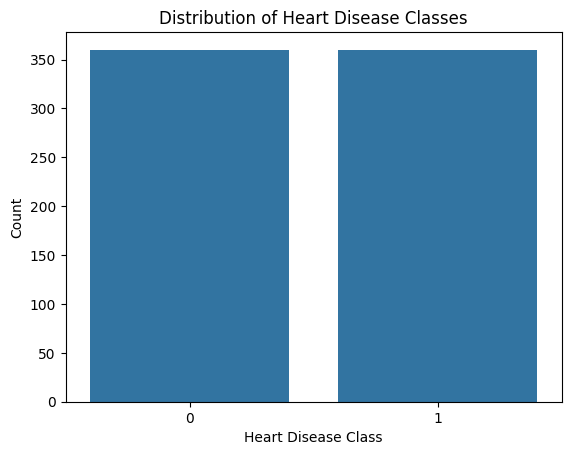

In [65]:
sns.countplot(data=df, x='target')
plt.title("Distribution of Heart Disease Classes")
plt.xlabel("Heart Disease Class")
plt.ylabel("Count")
plt.show()


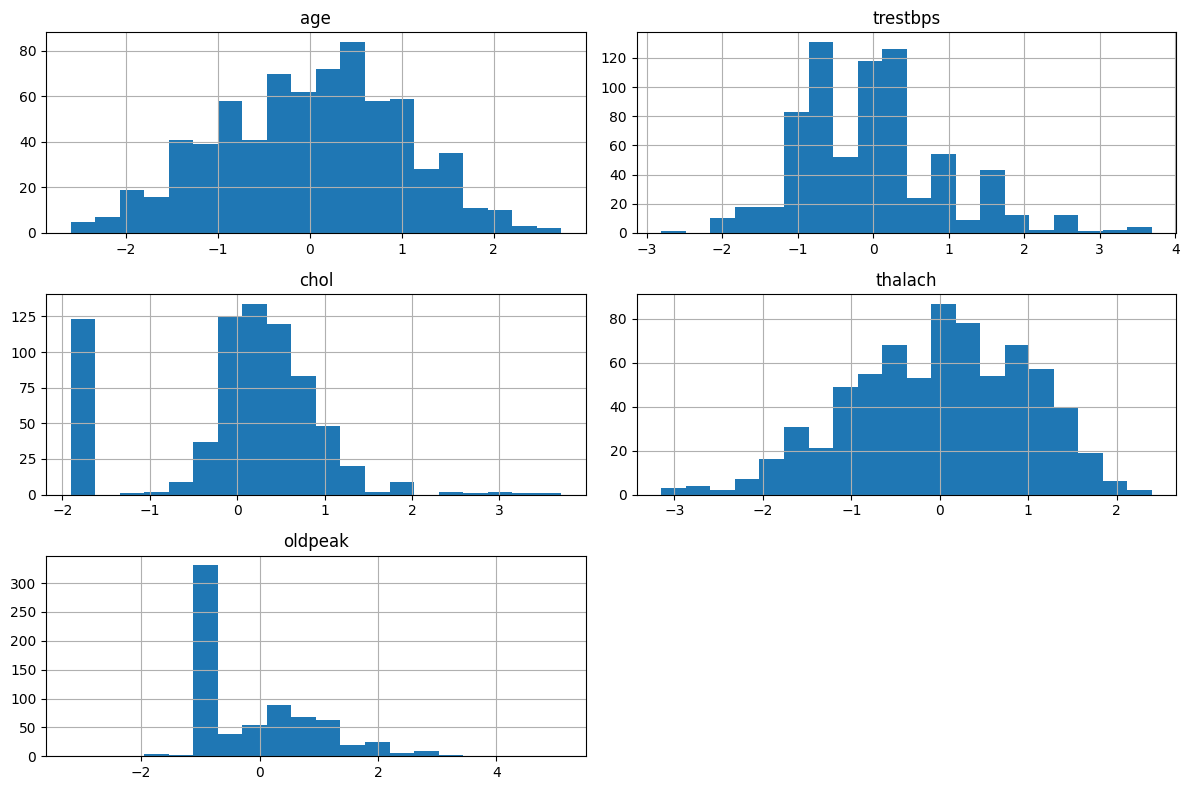

In [66]:
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()


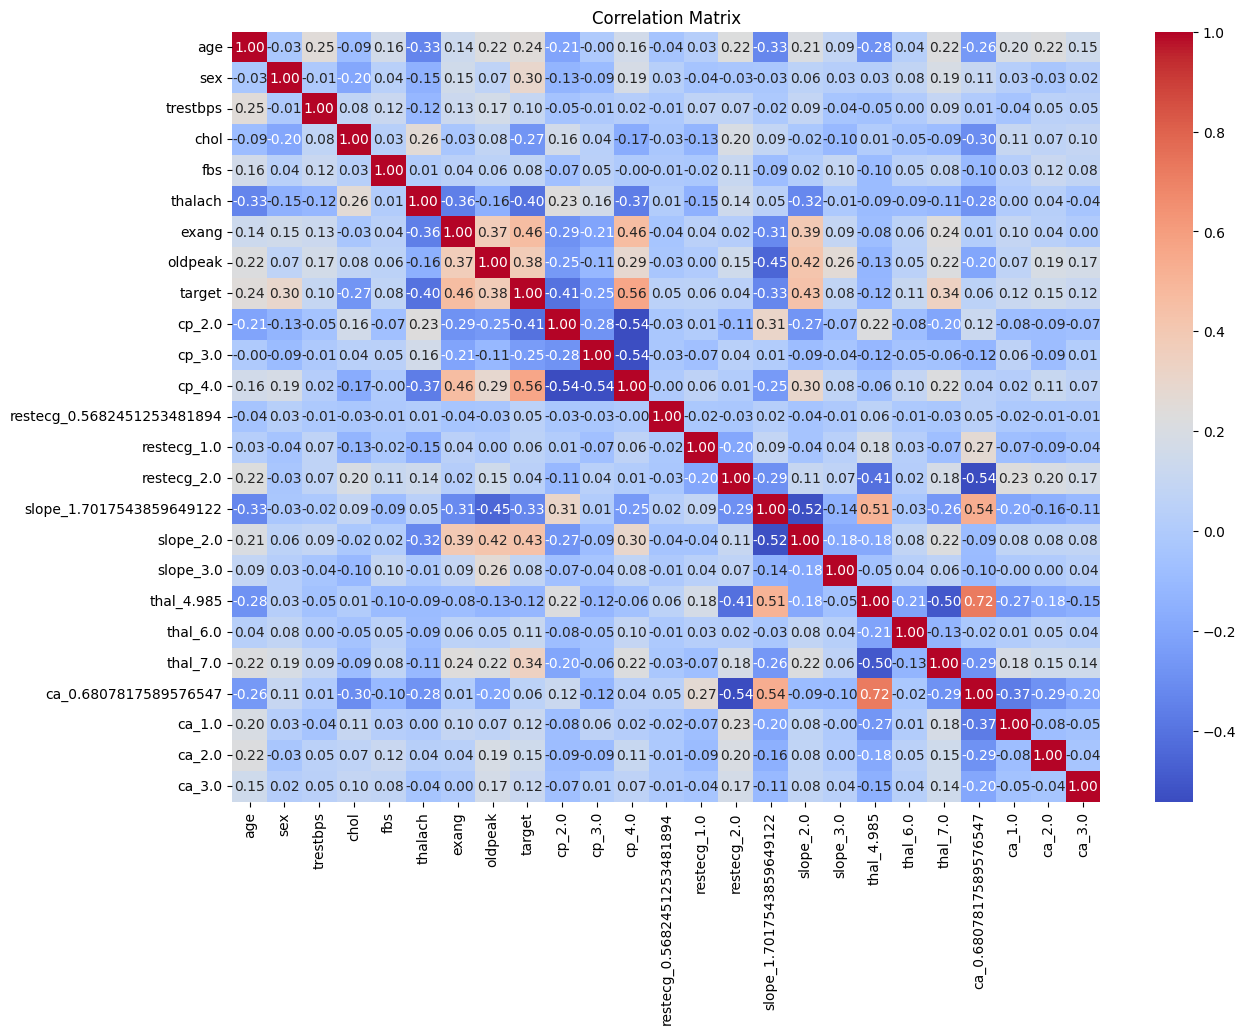

In [67]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


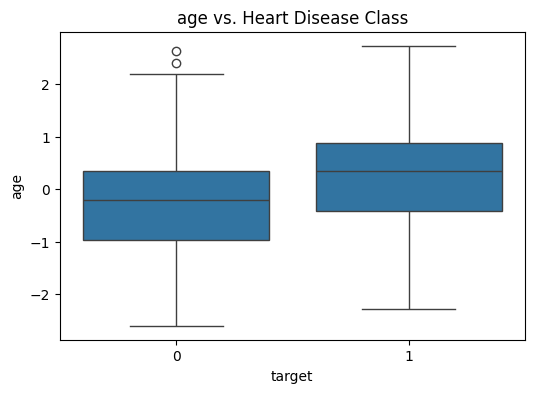

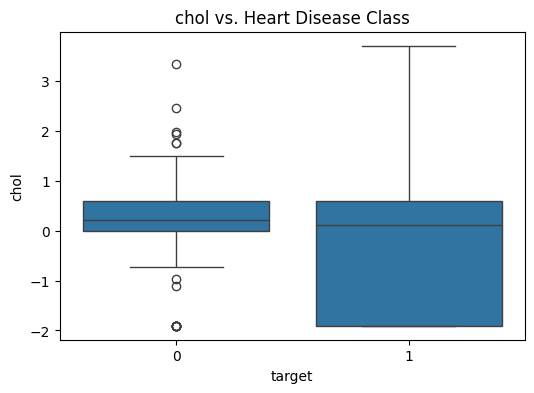

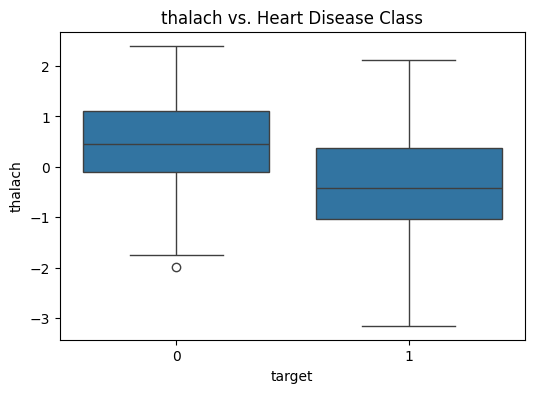

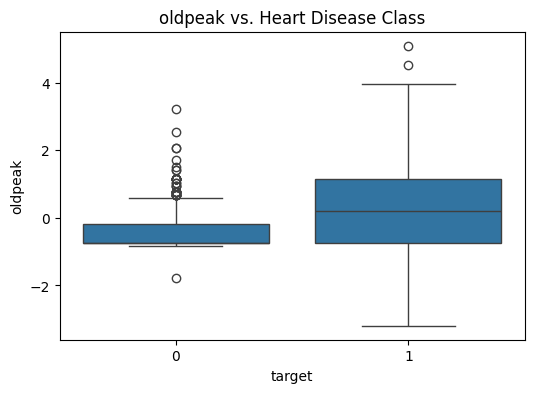

In [68]:
features_to_plot = ['age', 'chol', 'thalach', 'oldpeak']

for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f"{feature} vs. Heart Disease Class")
    plt.show()


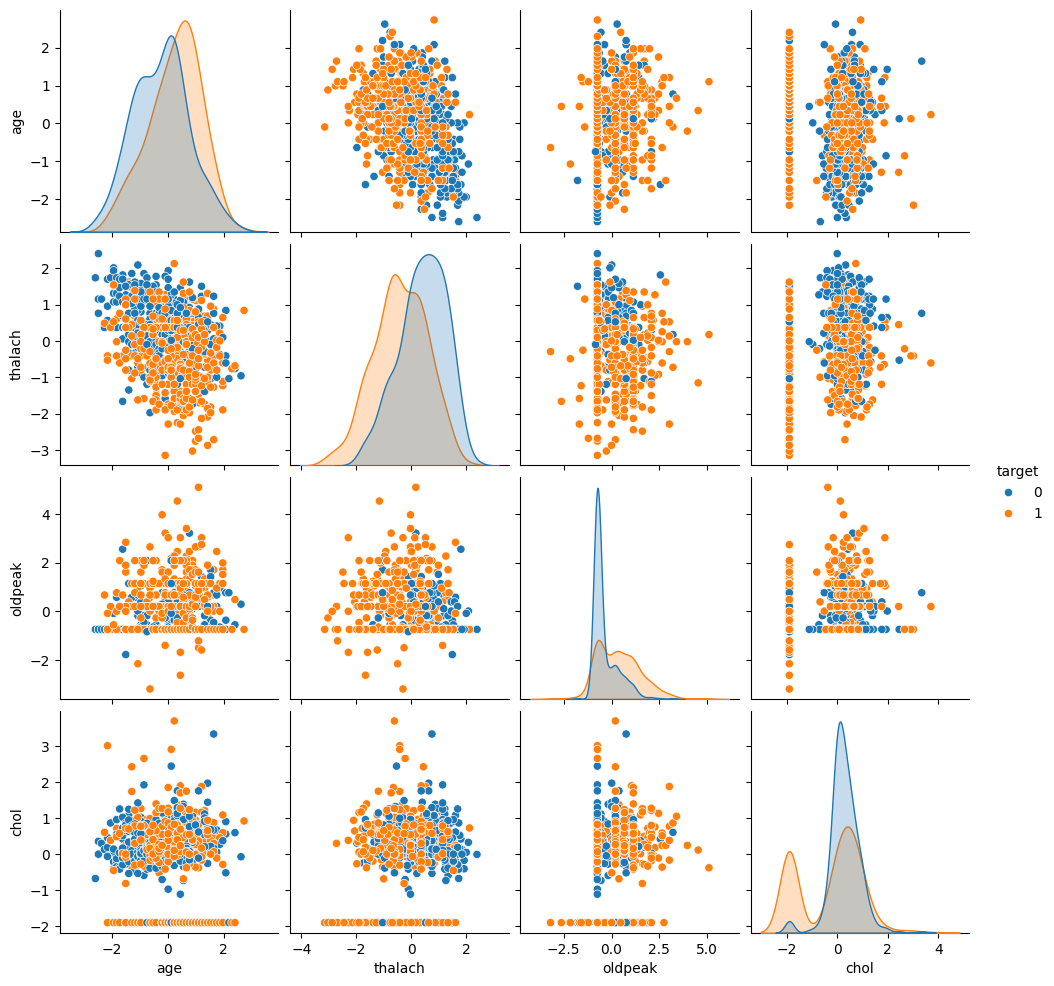

In [69]:
sns.pairplot(df, vars=['age', 'thalach', 'oldpeak', 'chol'], hue='target')


In [70]:
# Save cleaned data using config path
from config import CLEANED_DATA_PATH
df_encoded.to_csv(CLEANED_DATA_PATH, index=False)
print(f"✅ Saved cleaned data to {CLEANED_DATA_PATH}")

✅ Saved cleaned data to G:\Courses\Sprints_ML\Project\data\cleaned_data.csv
